# Linear reggresion

y = m + bx,
m = intercept,
b = slope

In [216]:
import numpy as np
import matplotlib.pyplot as plt

In [217]:
np.random.seed(42)
X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

## Cost function

Mean squared error is function that will minimize the parameters (theta) over our dataset. 

In [218]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * sum(np.square((np.dot(X,theta) - y)))

## Gradient descent

In [248]:
def gradient_descent(X, y, alpha=0.1, num_iters=100):
    p = []
    theta = np.zeros(2)
    X = np.column_stack((np.ones(X.shape[0]),X))
    m = len(y) # number of rows (training examples)
    J_hist = np.zeros(num_iters)
    theta_hist = np.zeros((num_iters,2))
    for i in range(0,num_iters):
        prediction = X.dot(theta)
        
        theta = theta - alpha*1/m * X.T.dot((prediction-y))
        J_hist[i] = cost_function(X, y, theta)
        theta_hist[i] = theta.T
        diff = 1 if i == 0 else J_hist[i-1] - J_hist[i]
        p.append(prediction)
    return (theta, J_hist, theta_hist, p)

### Cost function histogram

The theta values are the parameters (m and b). y = theta[0] + theta[1]x

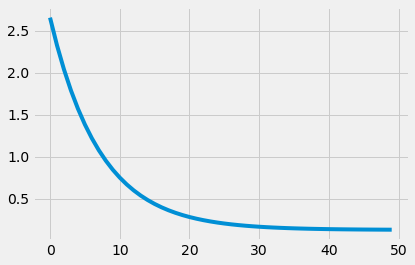

In [268]:
theta, J_hist, theta_hist, p = gradient_descent(X, y, 0.01,50)
plt.plot(np.arange(len(J_hist)), J_hist)
plt.show()

In [269]:
print(theta) # first value should be closest to zero, second value should be 1 (h(x) = 0.28 + 0.84x),  y = m + bx

[0.28670342 0.85246866]


Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

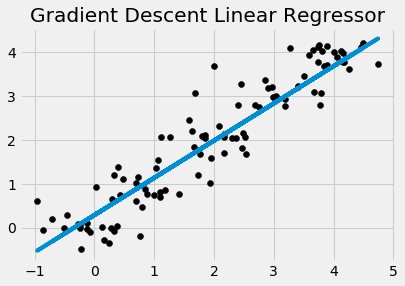

In [274]:
plt.scatter(X, y, color='black')
plt.plot(X, p[-1])
plt.gca().set_title("Gradient Descent Linear Regressor")

In [277]:
#intercept, bias - should be near 0
theta[0]

0.2867034172883942

In [279]:
#slope - should be near 1
theta[1]

0.8524686556128377

## Normal equation

In [299]:
def normal_equation(X, y):
    X = np.column_stack((np.ones(X.shape[0]),X))
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [300]:
theta_norm = normal_equation(X,y)
print(theta_norm)

[0.28875762 0.88128896]


## Sklearn library linear regressor

In [296]:
from sklearn import linear_model
regr = linear_model.LinearRegression(normalize=True)

In [297]:
regr.fit(X.reshape(-1, 1), y)
theta_sklearn = [regr.intercept_, regr.coef_]

In [298]:
print(theta_sklearn)

[0.28875762105975045, array([0.88128896])]


Yes, all the  Hypotesis θ  are similar ! 